<a href="https://colab.research.google.com/github/Luesierrape/Curso-IA-Udea/blob/main/Eficiencia_Enka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de eficiencia energética Enka de Colombia.

In [1]:
#Importar librerias
import numpy as np #Libreria para cálculos numéricos (arrays, matrices, etc)
import scipy as sc #Similar a numpy (expandida), funcionalidades para trat de imágenes y datos
import matplotlib.pyplot as plt #Libreria de visualización
import pandas as pd #Libreria pandas

In [2]:
#Importar datos de drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importamos datos acerca de transformadores
lista_trafos = "/content/drive/Othercomputers/Mi-PC/Luis-Enka/Proyecto/Lista_de_Transformadores.xlsx"
df = pd.read_excel(lista_trafos)
df.to_csv("Trafos.csv", index=False)
pd.set_option('display.float_format', '{:,.2f}'.format)
df

,Red nombre,Placa,Nombre S/E,Principal o reserva,S,HV,LV,Uz,Grupo_Conexion,Po,Pc,Io,Aislamiento
0,E1,228030,Tablero diesel 1 y 2,Principal,800,13200,440,5.90,DY5,NaN,NaN,NaN,A0
1,E2,263441,Tablero diesel 1 y 2,Principal,800,13200,440,NaN,Dy5,NaN,NaN,NaN,A0
2,F6,NaN,Lab Qco,Principal,1250,13200,440,NaN,NaN,NaN,NaN,NaN,NaN
3,A1,315036,Lab Qco,Principal,315,13200,440,3.86,Dy5,NaN,NaN,NaN,A0
4,T1,228033,Lab Qco,Principal,800,13200,440,5.90,Dy5,NaN,NaN,NaN,A0
5,T2,228029,Lab Qco,Principal,1000,13200,440,5.90,Dy5,NaN,NaN,NaN,A0
6,H1,228034,Lab Qco,Principal,800,13200,440,5.90,Dy5,NaN,NaN,NaN,A0
7,H2,236440,Lab Qco,Principal,800,13200,440,6.00,Dy5,NaN,NaN,NaN,A0
8,H3,8274754,Lab Qco,Principal,800,13200,440,4.04,Dy5,NaN,NaN,NaN,A0
9,A6,-,CPU,Principal,315,13200,440,4.50,DY5,"2,900.00","14,800.00",3.00,A0


In [6]:
from numpy.core.numeric import NaN
#Tabla 6. GM-02 GUIA METODOLOGICA CALCULO DE PERDIDAS DE ENERGIA

#Importamos tabla
tabla6_GM02 = "/content/drive/Othercomputers/Mi-PC/Luis-Enka/Proyecto/Tabla6_GM02.xlsx"
tab6 = pd.read_excel(tabla6_GM02)
tab6.to_csv("Tabla6_GM02.csv", index=False)

tab6.Po = tab6.Po/1000
tab6.Pc = tab6.Pc/1000

df_copy = df.copy()
df_copy.Po = df_copy.Po/1000
df_copy.Pc = df_copy.Pc/1000

#Pre-procesamiento de datos.

for Pot in tab6["Potencia"] :
  df_copy.loc[df_copy.S == Pot,"Io"] = df_copy.loc[df_copy.S == Pot,"Io"].fillna(float(tab6.Io[tab6.index[tab6["Potencia"]==Pot]]))
  df_copy.loc[df_copy.S == Pot,"Po"] = df_copy.loc[df_copy.S == Pot,"Po"].fillna(float(tab6.Po[tab6.index[tab6["Potencia"]==Pot]]))
  df_copy.loc[df_copy.S == Pot,"Pc"] = df_copy.loc[df_copy.S == Pot,"Pc"].fillna(float(tab6.Pc[tab6.index[tab6["Potencia"]==Pot]]))
  df_copy.loc[df_copy.S == Pot,"Uz"] = df_copy.loc[df_copy.S == Pot,"Uz"].fillna(float(tab6.Uz[tab6.index[tab6["Potencia"]==Pot]]))

R = df_copy["Principal o reserva"] == "Reserva"
T_reservas = df_copy[R]
T_reservas.head()

,Red nombre,Placa,Nombre S/E,Principal o reserva,S,HV,LV,Uz,Grupo_Conexion,Po,Pc,Io,Aislamiento
11,R1,5733426-2,Fibras L1,Reserva,1000,13200,440,4.90,Dy5,1.98,12.00,1.20,A0
14,R4,49828906,CPU,Reserva,1600,13200,440,6.00,DY5,3.20,23.20,1.50,A0
19,R2,NaN,Convenka,Reserva,800,13200,440,6.00,NaN,1.80,9.33,1.50,NaN
27,R3,NaN,Chiller II-B,Reserva,1000,13200,440,6.00,NaN,1.98,12.00,1.20,NaN


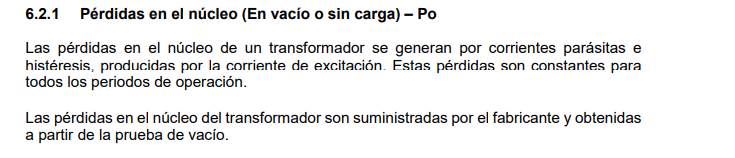

In [7]:
# Perdidas en el núcleo. Reservas.
Po = T_reservas.Po
T_reservas.loc[:,['Red nombre','S','Po']]

,Red nombre,S,Po
11,R1,1000,1.98
14,R4,1600,3.20
19,R2,800,1.80
27,R3,1000,1.98


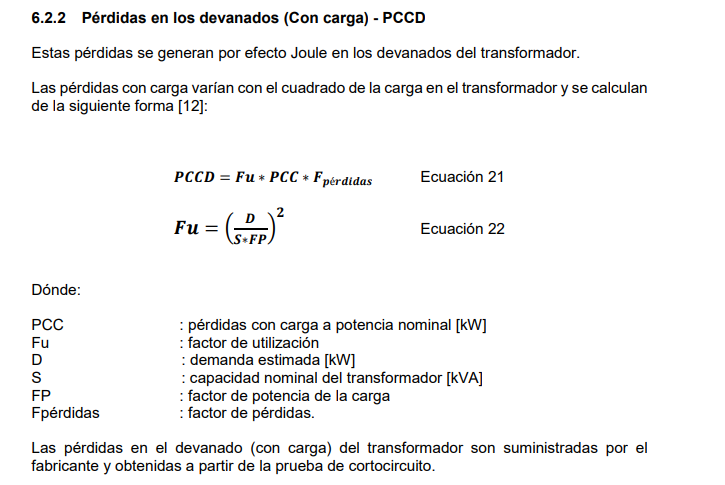

In [8]:
#Perdidas en los devanados con carga (PCCD)
FP = 0.85
D = np.random.randint(0,T_reservas.S) #Definir factor de demanda estimada.
#Fu = (D/(T_reservas.S*FP))**2 
Fu = 0

Fc = np.random.randint(0,T_reservas.S)*0.001 #Definir factor de cargas para trafos de reserva.
Fperdidas = 0.7*(Fc**2) + 0.3*Fc 
Fc, Fperdidas.round(2)

PCCD = Fu*Fperdidas*T_reservas.Pc
PCCD

11   0.00
14   0.00
19   0.00
27   0.00
Name: Pc, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


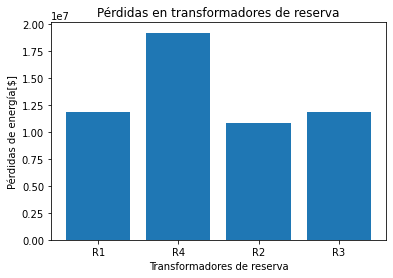

,Potencia aparente [kVA],Perdidas en vacio [kW],Corriente sin carga [%],Perdidas totales [kW],Perdidas de energia [kWh-año],Perdidas anuales [$]
Transformador,,,,,,
R1,1000,1.98,1.20,1.98,"17,344.80","11,890,727.64"
R4,1600,3.20,1.50,3.20,"28,032.00","19,217,337.60"
R2,800,1.80,1.50,1.80,"15,768.00","10,809,752.40"
R3,1000,1.98,1.20,1.98,"17,344.80","11,890,727.64"


In [9]:
from matplotlib import axes
#Porcentaje de perdidas de potencia en transformadores. Pérdidas totales
T_reservas = df_copy[R]
Pt = Po + PCCD #Perdidas totales
Percent_Pt = (Pt/(D*Fc))*100 #Porcentaje de perdidas
Pe = 8760*Pt #Perdidas de energia en kWh-año
Costo_Energia = 685.55 #Dato tomado de  Tarifas y Costo de Energía Eléctrica - Mercado Regulado - enero de 2022, EPM
Pe_año = Pe*Costo_Energia #$/año

T_reservas.insert(12,"Pt", Pt)
T_reservas.insert(12,"% Perdidas", Percent_Pt)
T_reservas.insert(12,"Pe", Pe )
T_reservas.insert(12,"Perdidas año", Pe_año )

T_reservas.rename(columns={'Red nombre':'Transformador',
                          'S':'Potencia aparente [kVA]','Po':'Perdidas en vacio [kW]','Io':'Corriente sin carga [%]',
                          'Pt':'Perdidas totales [kW]','Pe':'Perdidas de energia [kWh-año]',
                          "Perdidas año":'Perdidas anuales [$]'},inplace=True)

T_reservas.set_index('Transformador',inplace=True)
plt.bar(T_reservas.index ,T_reservas["Perdidas anuales [$]"])
plt.title("Pérdidas en transformadores de reserva")
plt.xlabel("Transformadores de reserva")
plt.ylabel("Pérdidas de energía[$]")
plt.show()

T_reservas.loc[:,['Potencia aparente [kVA]','Perdidas en vacio [kW]','Corriente sin carga [%]',
                  'Perdidas totales [kW]','Perdidas de energia [kWh-año]','Perdidas anuales [$]']].head()


,Hora,kW L1,kW L2,kW L3,kW TOT MAX,kVA L1,kVA L2,kVA L3,kVAR L1,kVAR L2,kVAR L3,kvar TOT MAX
Fecha,,,,,,,,,,,,
0,0.00,4.84,4.56,3.34,146.31,5.00,4.64,3.52,1.17,0.72,1.00,118.09
1,1.00,4.69,4.44,3.21,146.31,4.85,4.51,3.38,1.15,0.68,0.96,118.09
2,2.00,4.63,4.43,3.17,146.31,4.81,4.52,3.35,1.16,0.70,0.96,118.09
3,3.00,4.53,4.37,3.09,146.31,4.70,4.43,3.27,1.17,0.65,0.96,118.09
4,4.00,4.44,4.31,3.04,146.31,4.61,4.39,3.22,1.15,0.67,0.96,118.09


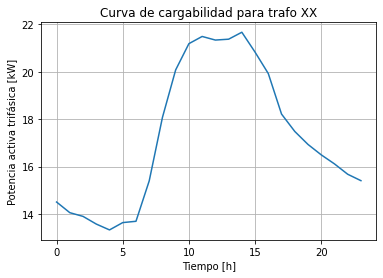

In [4]:
#@title
#Prueba con bloque 43
Bl43 = "/content/drive/Othercomputers/Mi-PC/Luis-Enka/Proyecto/Documentación requerida/Bl43.xlsx"
df_bl43 = pd.read_excel(Bl43)

df_bl43 = df_bl43.loc[:,['Fecha','kW L1','kW L2', 'kW L3','kW TOT MAX', 'kVA L1','kVA L2','kVA L3','kVAR L1','kVAR L2','kVAR L3','kvar TOT MAX']]
df_bl43['Fecha'] = pd.to_datetime(df_bl43['Fecha'])
df_bl43 = df_bl43.set_index('Fecha')
df_bl43 = df_bl43.resample('60min').mean()

hour = df_bl43.index.hour
df_bl43.insert(0,"Hora", hour)

max_kW = df_bl43["kW L1"].max()
df_bl43 = df_bl43.groupby(hour).mean()
plt.plot(3*df_bl43['kW L1'])
plt.title('Curva de cargabilidad para trafo XX')
plt.xlabel('Tiempo [h]')
plt.ylabel('Potencia activa trifásica [kW]')
plt.grid()
df_bl43.head()

